| Field | Value |
|-|-|
| simulation file | test_soma_cond.py |
| result files prefix | sine_task |
| # result files | 2\*1\*2\*2\*2\*2\*2 =  |
| simulation start | 2015-09-23 23:17:07 |
| simulation end | 2015-09-24 05:10:27 |
| duration | 5:53:20 |
| repository | https:/ |
| revision hash | [e2073ddcbafe2e7d5390859ea0b100d01448b8a3](https://tree/e2073ddcbafe2e7d5390859ea0b100d01448b8a3) |

this works surprisingly well!!!

In [57]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

In [58]:
%pylab inline
import cPickle
from helper import PeriodicAccumulator, BooleanAccumulator
from itertools import product

Populating the interactive namespace from numpy and matplotlib


In [5]:
def get(n_syn, g_factor, cycle_dur, g_S, alpha, beta, r_max):
    return cPickle.load(open('sine_task_n_syn_{0}_g_factor_{1}_cycle_dur_{2}_g_S_{3}_alpha_{4}_beta_{5}_r_max_{6}.p'.format(n_syn, g_factor, cycle_dur, g_S, alpha, beta, r_max),'rb'))


n_syn_s = [str(a) for a in [100, 200]]
g_factor_s = [str(a) for a in [10]]
cycle_dur_s = [str(a) for a in [100, 200]]
g_S_s = [str(a) for a in [0.0, 0.5]]
alpha_s = [str(a) for a in [-50.0, -55.0]]
beta_s = [str(a) for a in [0.2, 0.25]]
r_max_s = [str(a) for a in [0.25, 0.35]]


params = list(product(n_syn_s, g_factor_s, cycle_dur_s, g_S_s, alpha_s, beta_s, r_max_s))

data = {tup:get(*tup) for tup in params}

In [6]:
from IPython.html.widgets import interact, interactive, fixed
from IPython.html import widgets
from IPython.display import clear_output, display, HTML

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [10]:
def show_plot(key,n_syn, g_factor, cycle_dur, g_S, alpha, beta, r_max,y_c,t_min,t_max):
    figure(figsize=(12,5))
    p = (n_syn, g_factor, cycle_dur, g_S, alpha, beta, r_max)
    ts = data[p][0].t
    mask = np.logical_and(ts>=t_min,ts<=t_max)
    if key=='y':
        plot(data[p][0].t[mask],data[p][0].res[key][mask,:int(y_c)+1])
    else:
        plot(data[p][0].t[mask],data[p][0].res[key][mask])


In [13]:
print plt.style.available
plt.style.use('ggplot')

[u'grayscale', u'bmh', u'dark_background', u'ggplot', u'fivethirtyeight']


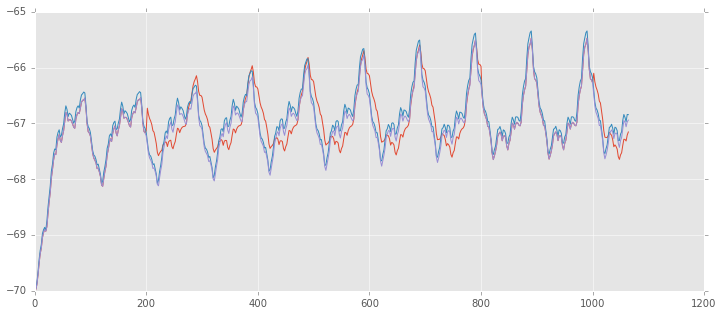

In [14]:
ts = data[params[-1]][0].t
i = interact(show_plot,
key=widgets.ToggleButtons(description='key',options=['dendr_pred','weights','weight_updates', 'PIVs', 'y','h']),
t_min=(0,int(np.round(ts[-1]))),
t_max=(0,int(np.round(ts[-1]))),
n_syn=widgets.ToggleButtons(description='n_syn',options=n_syn_s),
g_factor=widgets.ToggleButtons(description='g_factor',options=g_factor_s),
cycle_dur=widgets.ToggleButtons(description='cycle_dur',options=cycle_dur_s),
g_S=widgets.ToggleButtons(description='g_S',options=g_S_s),
alpha=widgets.ToggleButtons(description='alpha',options=alpha_s),
beta=widgets.ToggleButtons(description='beta',options=beta_s),
r_max=widgets.ToggleButtons(description='r_max',options=r_max_s),
y_c=widgets.ToggleButtons(description='y_c',options=[str(a) for a in range(5)]))


In [59]:
epochs = 4
l_c = 6
eval_c = 2
cycles = epochs * l_c + (epochs + 1) * eval_c
G_FACTOR = 100
E_E = 0.0
E_I = -75.0

In [82]:
def exc_soma_cond(t, cycle_dur):
    t_end = cycles * cycle_dur
    return ((1 + np.sin(np.pi / 2 + t / t_end * cycles * 2 * np.pi)) * 7e-3 * 1 + 7e-3) * G_FACTOR

def inh_soma_cond(t):
        return 4e-2 * G_FACTOR
    
def match_pot(t, c_d=100):
    return (exc_soma_cond(t, c_d)*E_E+inh_soma_cond(t)*E_I)/(exc_soma_cond(t, c_d)+inh_soma_cond(t))

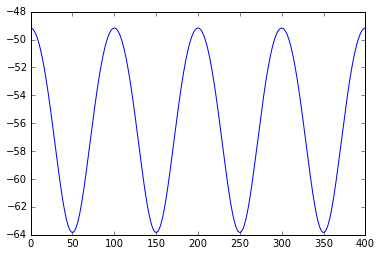

In [83]:
ts = linspace(0,400,1000)
plot(ts,map(match_pot, ts))

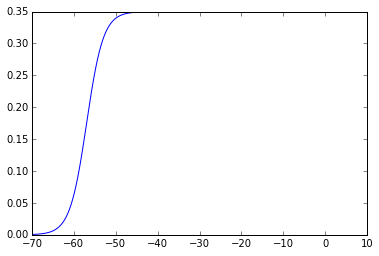

In [56]:
def phi(v, alpha, beta, r_max):
    return r_max / (1 + np.exp(-beta * (v - alpha)))

vs = linspace(-70, 10, 1000)
plot(vs, map(lambda v: phi(v, -57, 0.5, 0.35), vs))

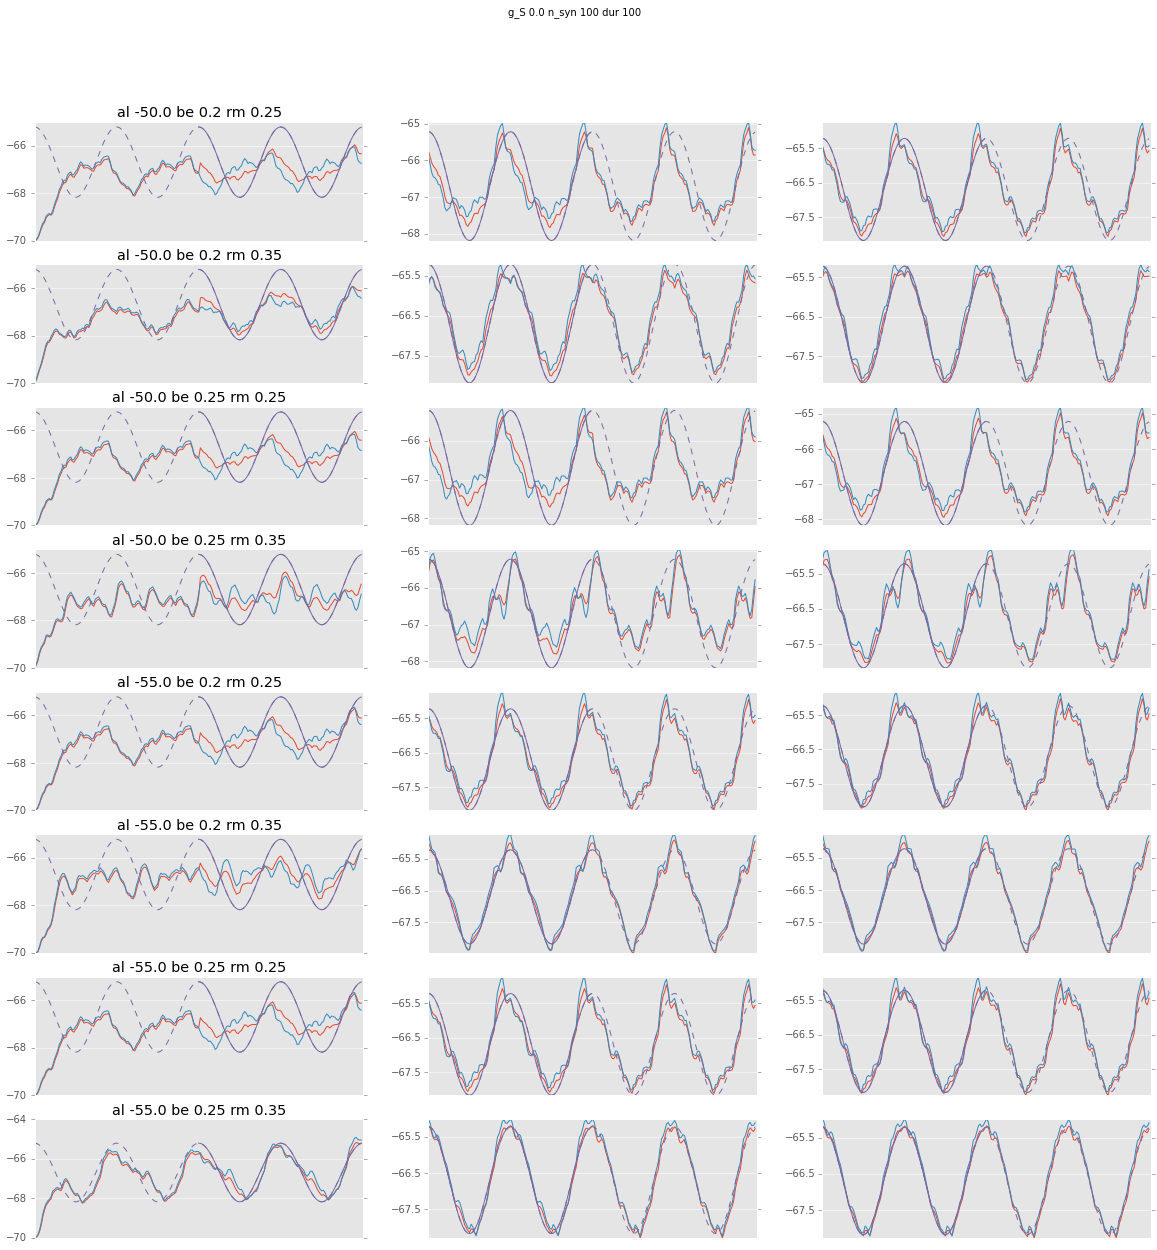

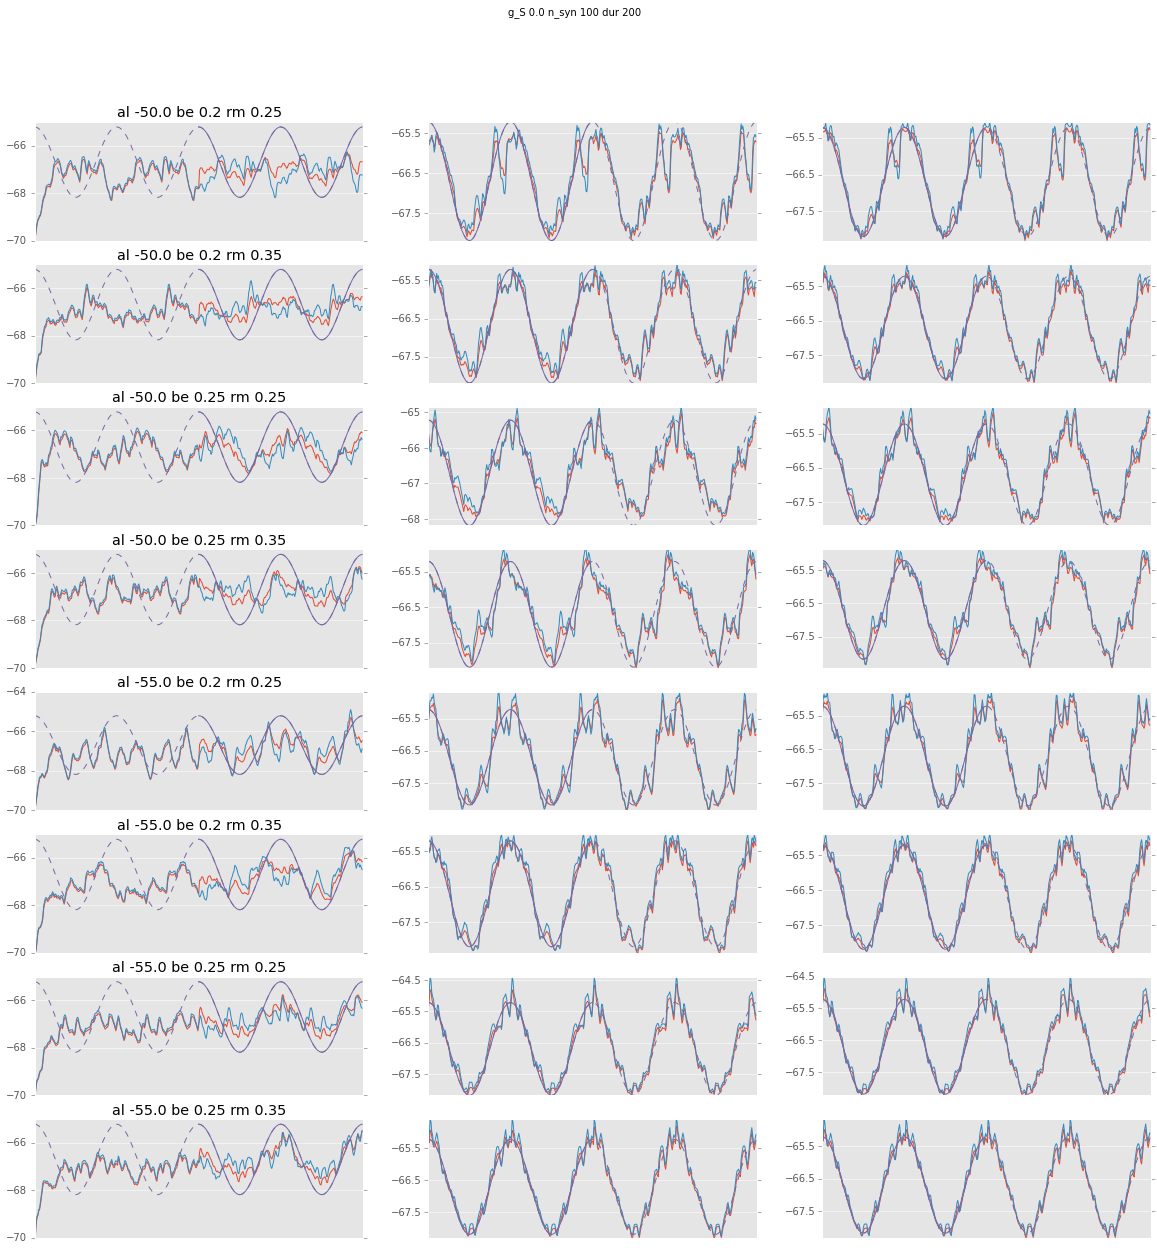

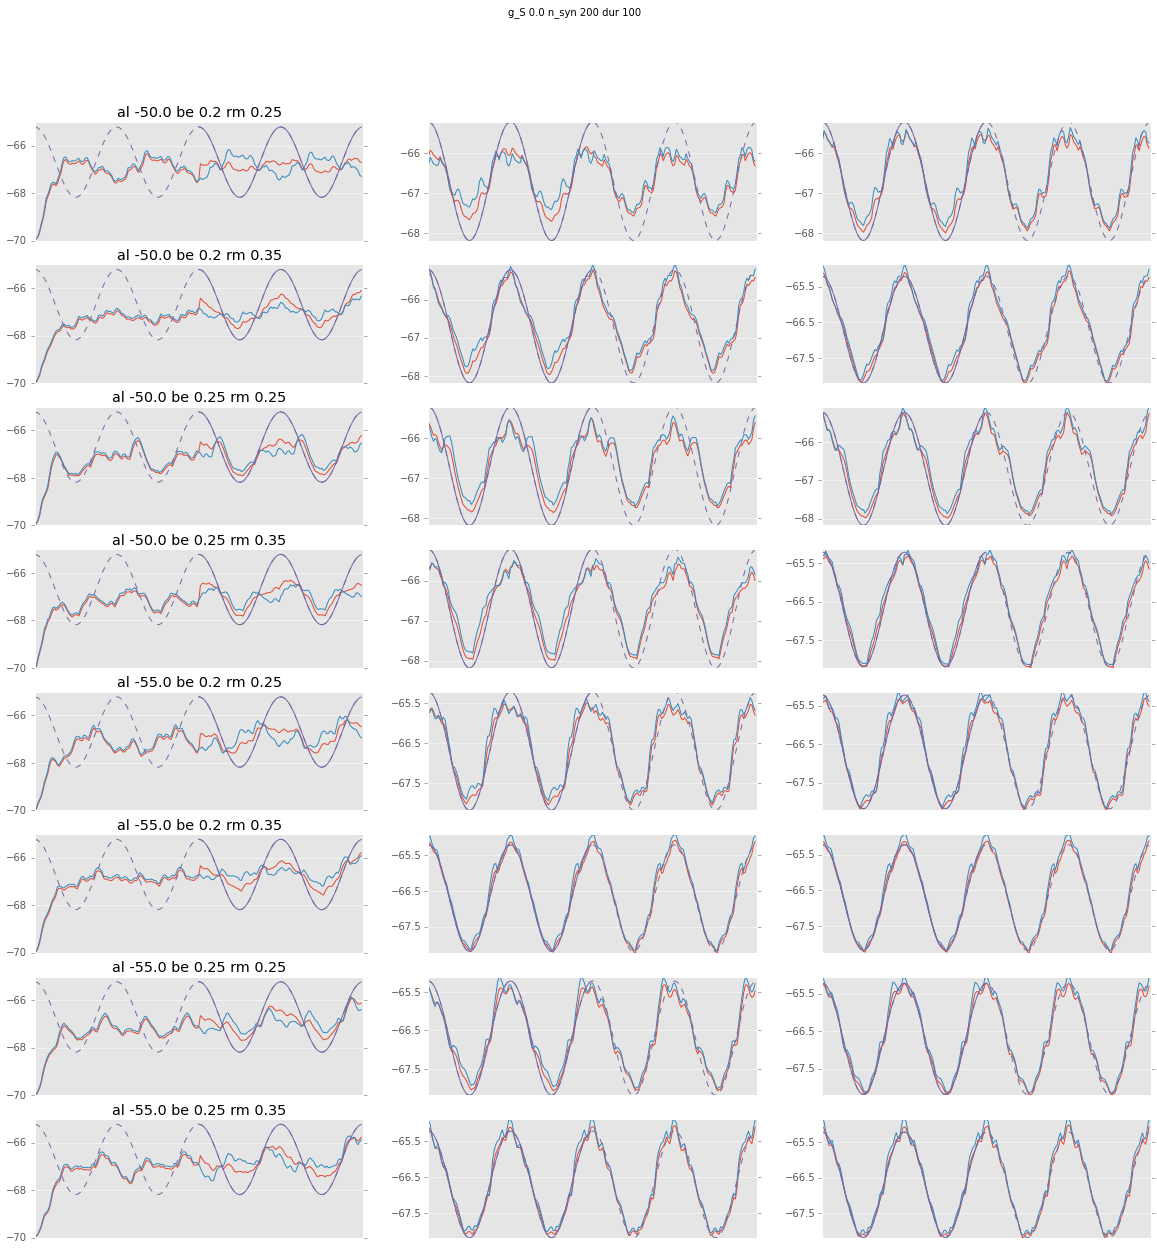

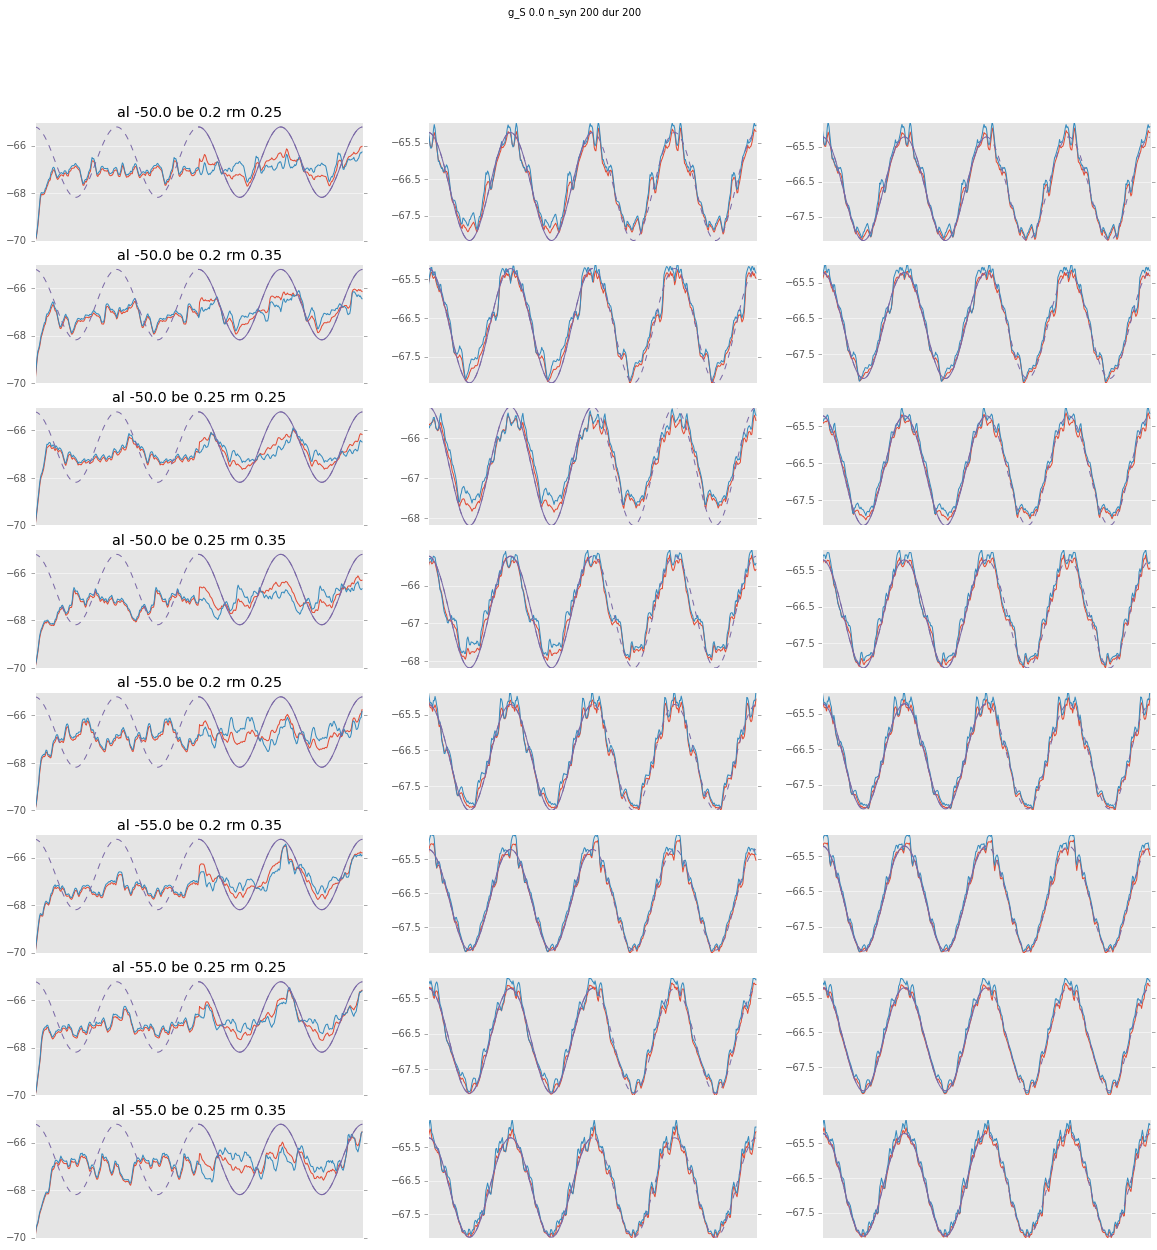

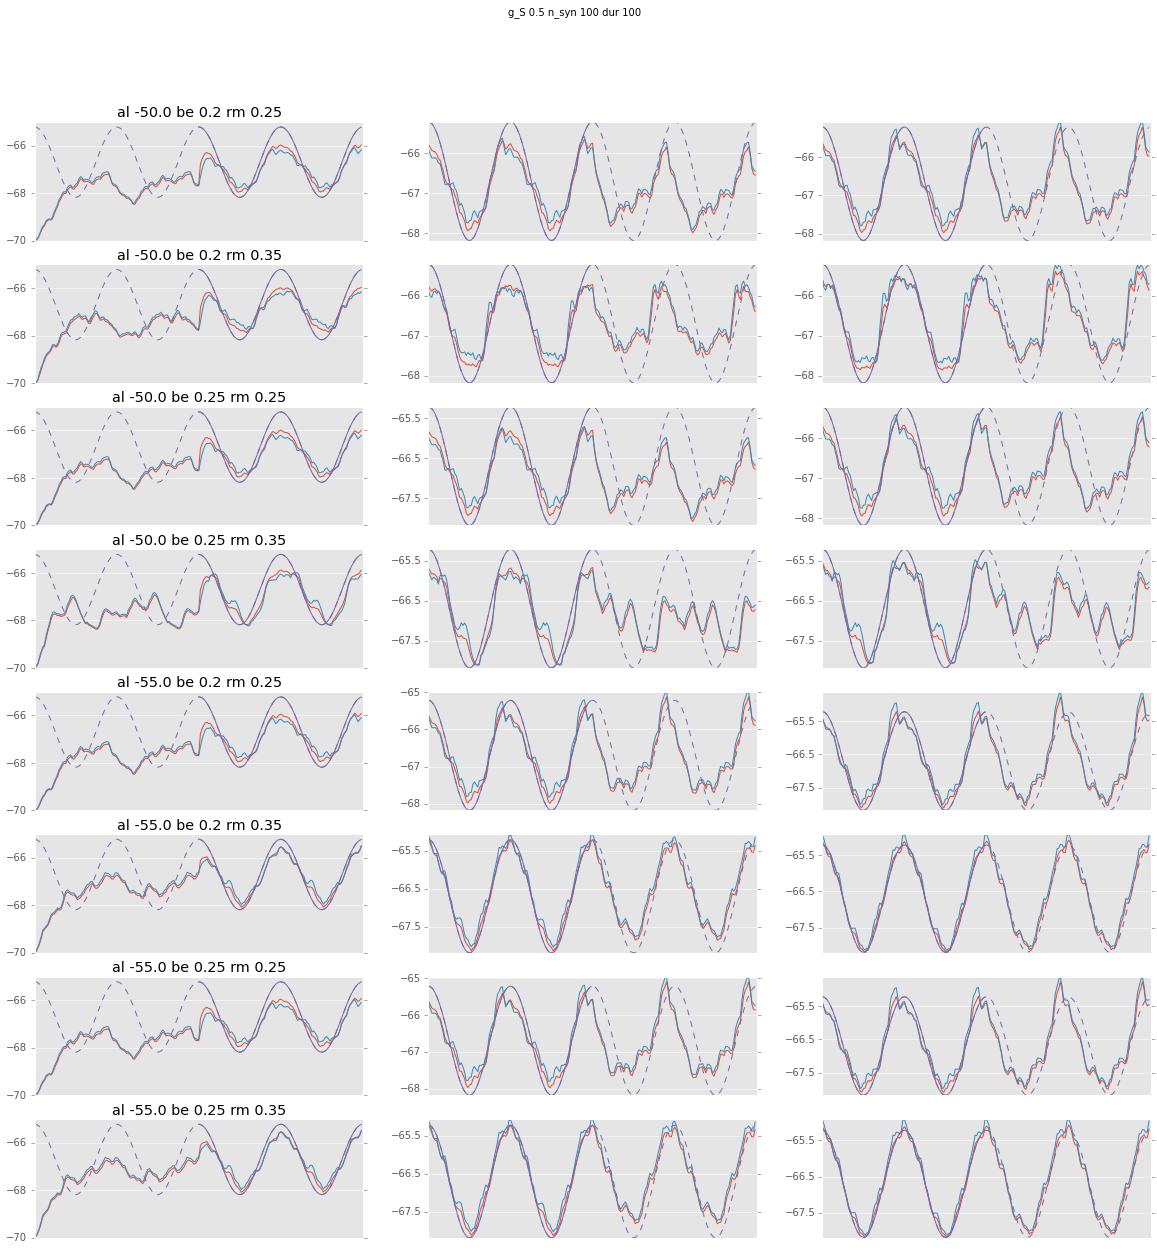

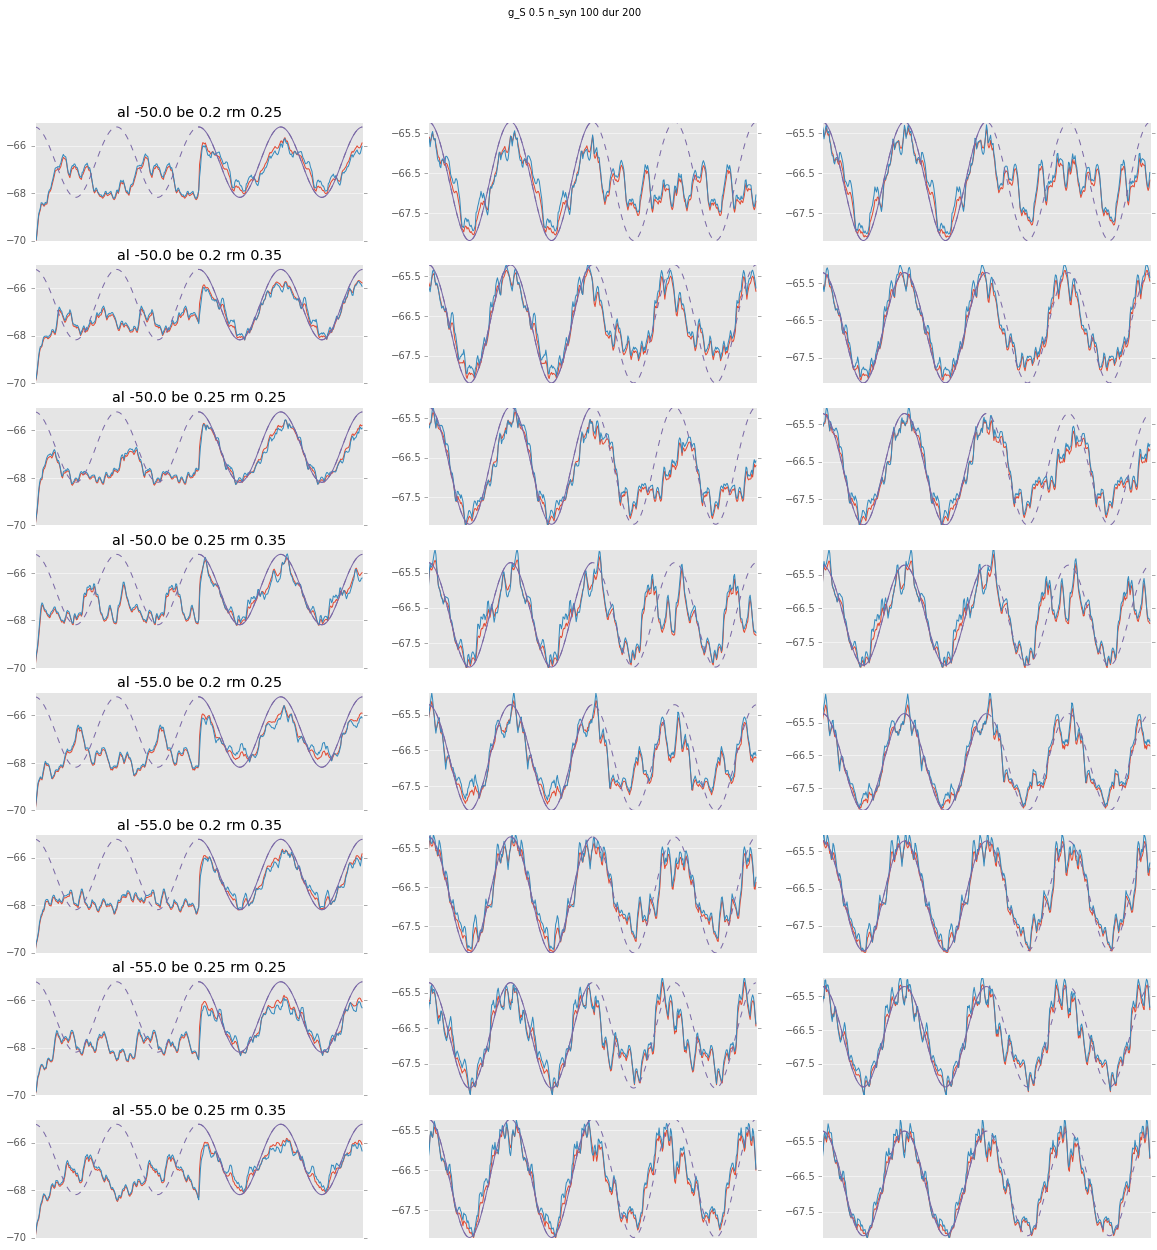

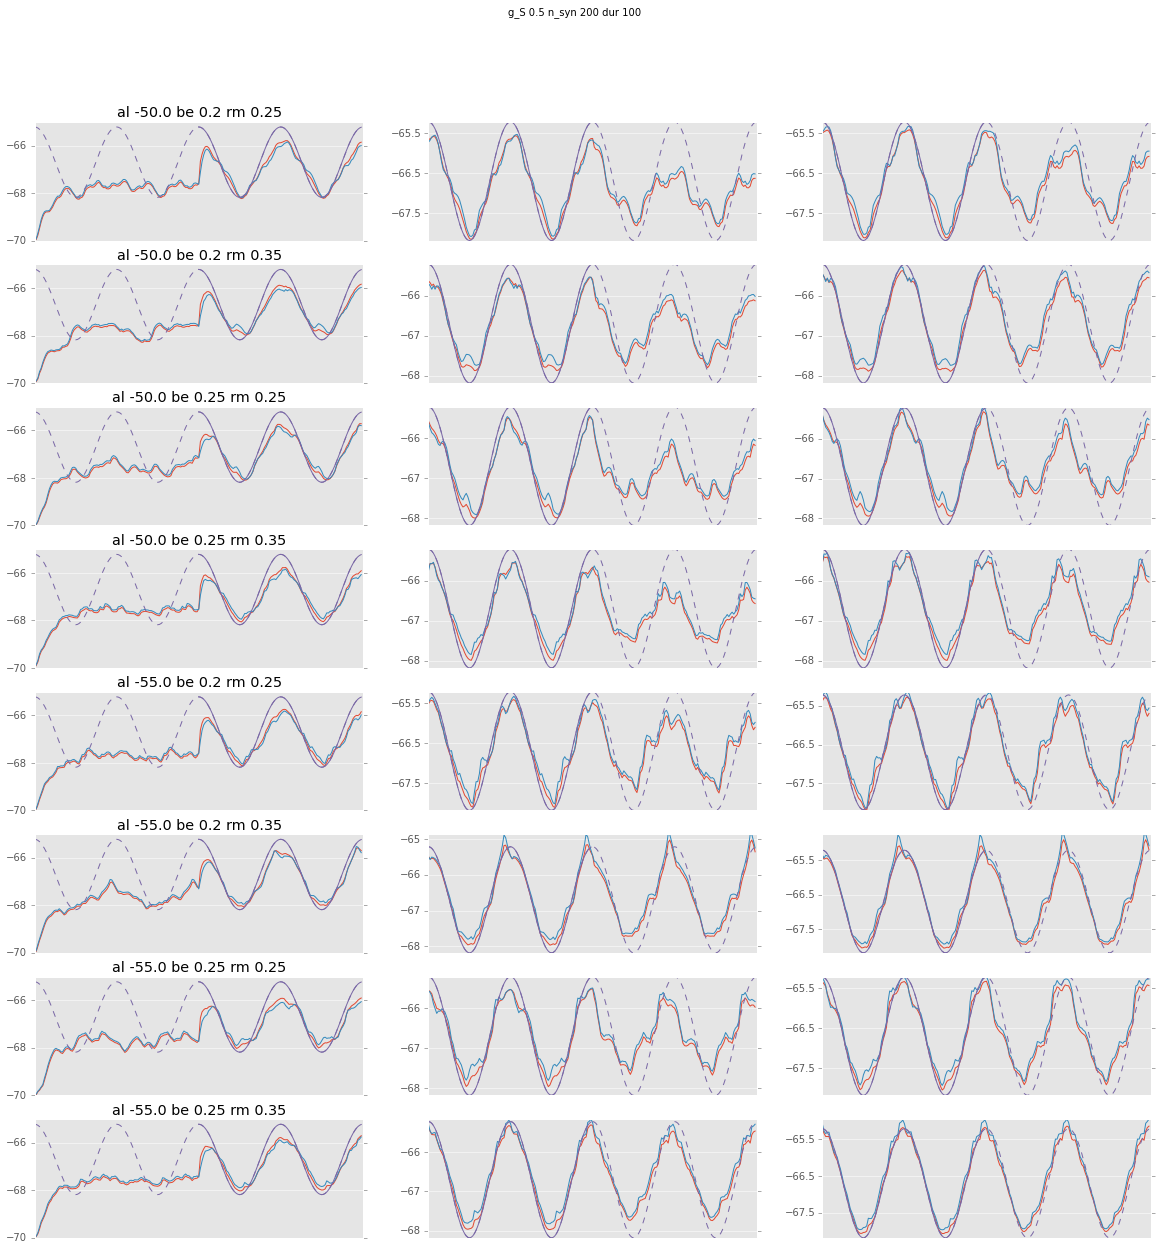

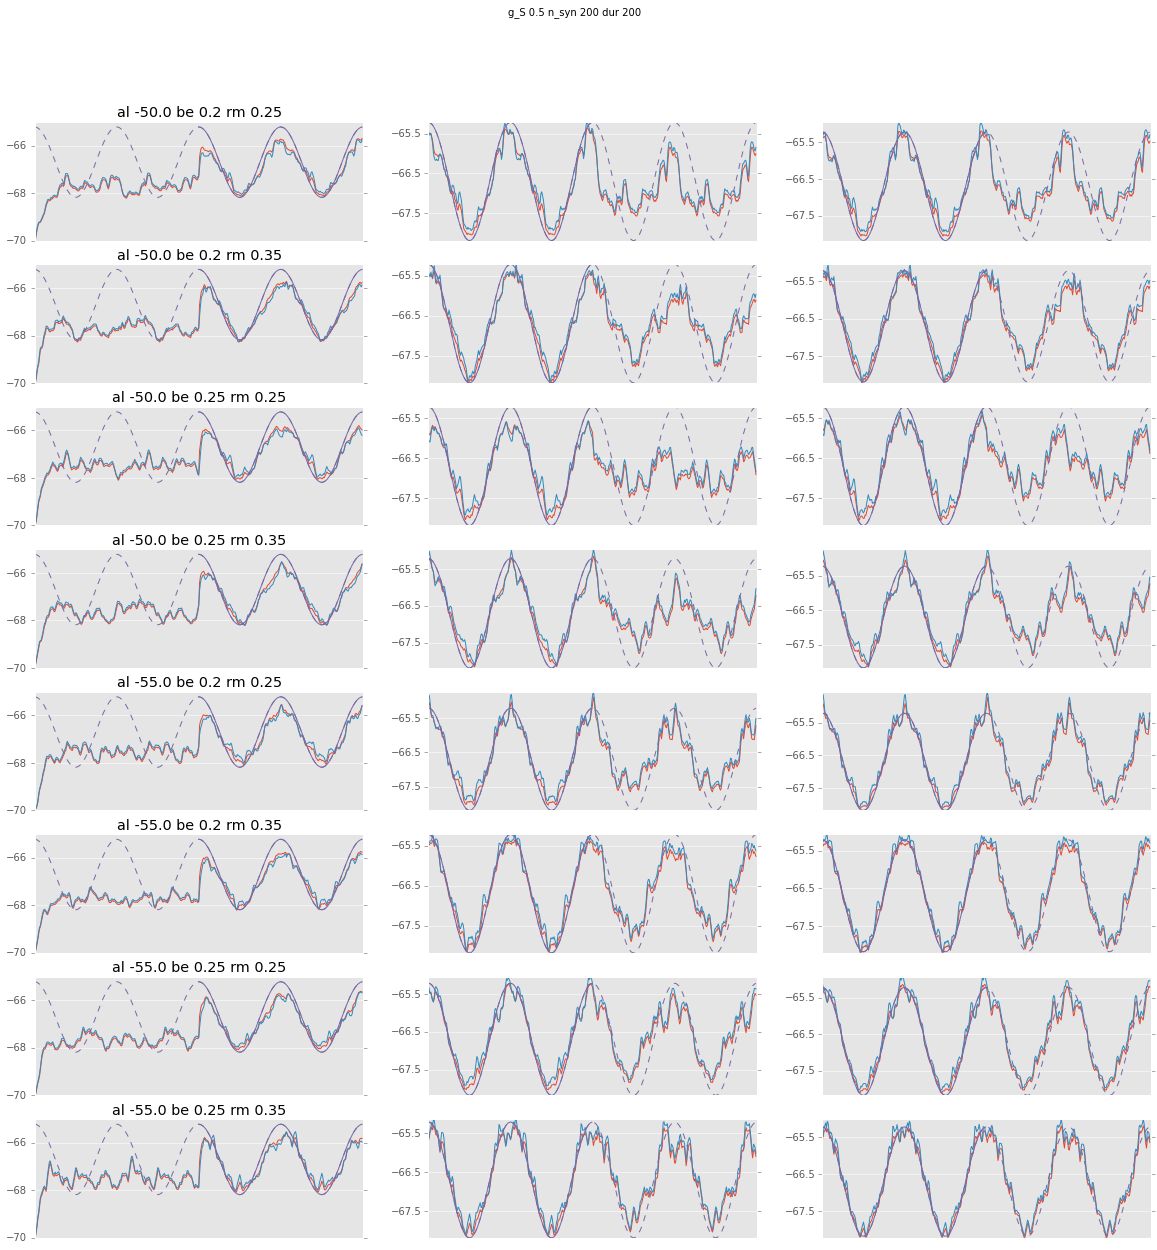

In [94]:
phi_combs = list(product(alpha_s, beta_s, r_max_s))
for g_S in g_S_s:
    for n_syn in n_syn_s:
        for cycle_dur in cycle_dur_s:
            c_d = int(cycle_dur)
            epoch_dur = c_d * (l_c + eval_c)
            figure(figsize = (20,20))
            for phi_idx, phi_comb in enumerate(phi_combs):
                alpha, beta, r_max = phi_comb
                p = (n_syn, str(G_FACTOR), cycle_dur, g_S, alpha, beta, r_max,)
                curr = data[p][0]
                subplot(len(phi_combs), len(epochs_show)+1, phi_idx*(len(epochs_show)+1) + 1)
                mask = curr.t < (eval_c+2) * c_d
                plot(curr.t[mask], curr.res['y'][mask, :2])
                plot(curr.t[mask], match_pot(curr.t[mask], c_d), '--', c='#7A68A6')
                mask = logical_and(mask, curr.t > eval_c*c_d)
                plot(curr.t[mask], match_pot(curr.t[mask], c_d), c='#7A68A6')
                yticks(yticks()[0][::2])
                xticks([])
                epochs_show = [2,4]
                title('al {0} be {1} rm {2}'.format(alpha, beta, r_max))
                for epoch_idx, epoch in enumerate(epochs_show):
                    subplot(len(phi_combs), len(epochs_show)+1, phi_idx*(len(epochs_show)+1) + epoch_idx +2)
                    mask = curr.t > epoch*epoch_dur-2*c_d
                    mask = logical_and(mask, curr.t < epoch*epoch_dur+2*c_d)
                    plot(curr.t[mask], curr.res['y'][mask, :2])
                    yticks(yticks()[0][::2])
                    plot(curr.t[mask], match_pot(curr.t[mask], c_d), '--', c='#7A68A6')
                    mask = logical_and(mask, curr.t < epoch*epoch_dur)
                    plot(curr.t[mask], match_pot(curr.t[mask], c_d), c='#7A68A6')
                    xticks([])
                #savefig('hi.pdf')
            suptitle('g_S {0} n_syn {1} dur {2}'.format(g_S, n_syn, cycle_dur))
            
            